<a href="https://colab.research.google.com/github/xp348/intelligent-information-systems/blob/main/%D0%A4%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_2020_Light_Python_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_9_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Библиотеки:

In [3]:
import matplotlib.pyplot as plt               #Для вывода графиков
from scipy.fftpack import fft, ifft          #Для расчета FFT
import numpy as np
from scipy import signal                      #Отсюда будем вытаскивать фильтры
import librosa                                #Для параметризации аудио
import librosa.display                        #Для отображения аудио сигналов
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
import IPython.display as ipd                 #Для проигрывания аудио
import scipy

%matplotlib inline

In [4]:
A=1.0 # Амплитуда сигнала
f=10 # Частота сигнала Hz
phi=1 # Начальная фаза синусоиды "Радианы"
fs=50 # Частота семплирования Hz
t=0.1 # продолжительность сигнала (секунды)

**Light**

Задание 1:

Переписать функцию Sine , таким образом, чтобы на выходе получать сигнал косинуса вместо синуса (np.cos)


















In [ ]:
def Sine(A, f, phi, fs, t, N):
    T = t/fs         # Период семплирования
    n = np.arange(N) # Кол-во семплов
    x = A*np.sin(2*np.pi*f*n*T + phi)
    return x, n

In [ ]:
def Cosine(A, f, phi, fs, t, N):
    T = t/fs         # Период семплирования
    n = np.arange(N) # Кол-во семплов
    x = A*np.cos(2*np.pi*f*n*T + phi)
    return x, n

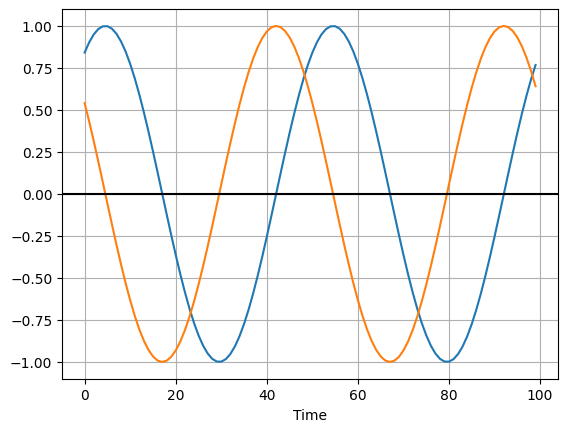

In [16]:
plt.plot(Sine(A, f, phi, fs, t, 100)[0])
plt.plot(Cosine(A, f, phi, fs, t, 100)[0])
plt.xlabel('Time')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

Задание 2:

Модифицировать функцию Sine таким образом чтобы можно было взвращать составной сигнал - состоящий из комбинаций sin и cos, каждая отдельная гармоническая функция в составном сигнале должна принимать свои параметры:

A = Амплитуда сигнала

f = Частота сигнала Hz

phi = Начальная фаза синусоиды "Радианы"

Сделайте вариант с 2-мя и 3-мя гармоническими сигналами

Задание 3:

Дан сигнал 3np.sin(2np.pi5.45*0.002 + 2.) Перепишите выражение таким образом, чтобы: а) амплитуда увеличилась в 2 раза б) Фаза сигнала была в 0.

Задание 4:

Сигнал задан следующей функцией:
t = np.linspace(0, 1, n, endpoint=True)
np.sin(3*np.pi*t) + np.sin(5*np.pi*t)
Отобразить на графике Аналоговый, Дискретный и Квантованные сигналы

Задание 5:

Загрузите любой аудио сигнал и сделайте его Фурье преобразование. Выведите на графике амплитудный спектр.

Задача 6:

Найдите модуль и аргумент спектра для следующего сигнала гармонического сигнала: синус (np.sin) С Частотой 20Гц Амплитудой 3 И фазой 1

**PRO**


Задача 1:

Найдите модуль спектра для следующего сигнала [5,3,0,0,0,-1,3, 3, 5, 0].


Задача 2:

Дан сложный сигнал состаящий из 4-х гармонических компонент (синус) с различными значениями амплитуд и частот. Выведите спектр сигнала, на основе спектра определите частоты и амплитуды гармонических составляющих

сигнал (50 отсчетов): [ 0.00000000e+00, 6.61225969e+00, 3.25848078e+00, -1.20084548e+00, 3.45301249e+00, 8.94406332e+00, 4.69738850e+00, -1.36112077e+00, 2.18739790e+00, 8.35228095e+00, 5.25735866e+00, -1.07697134e+00, 1.30202985e+00, 6.87594476e+00, 3.25150704e+00, -4.69190350e+00, -3.88118391e+00, 2.10527395e+00, 3.66950398e-01, -6.14121684e+00, -4.38906614e+00, 3.21326193e+00, 3.07651304e+00, -3.62470149e+00, -3.41879558e+00, 3.41879558e+00, 3.62470149e+00, -3.07651304e+00, -3.21326193e+00, 4.38906614e+00, 6.14121684e+00, -3.66950398e-01, -2.10527395e+00, 3.88118391e+00, 4.69190350e+00, -3.25150704e+00, -6.87594476e+00, -1.30202985e+00, 1.07697134e+00, -5.25735866e+00, -8.35228095e+00, -2.18739790e+00, 1.36112077e+00, -4.69738850e+00, -8.94406332e+00, -3.45301249e+00, 1.20084548e+00, -3.25848078e+00, -6.61225969e+00, -1.78798433e-14]

Задача 3:

Самостоятельно ознакомившись с тем что такое Автокорреляционная функция рассчитать и отобразить графически Автокорреляционную функцию прямоугольного импульса: [np.zeros(8), np.ones(3), np.zeros(8)] , Напишите функцию вычисляющую автокорреляцию.

Задача 4:

Попробуйте подобрать другой тип сигнала (например, ЭКГ, временной ряд и т.д.) и сделать его преобразование Фурье. Выведите его спектрограмму и полученный после преобразования амплитудный спектр

